<a href="https://colab.research.google.com/github/Dristro/IIIT-H/blob/main/module04_01_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [ ]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

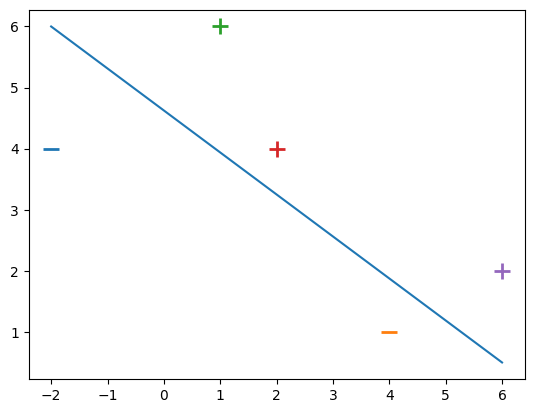

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

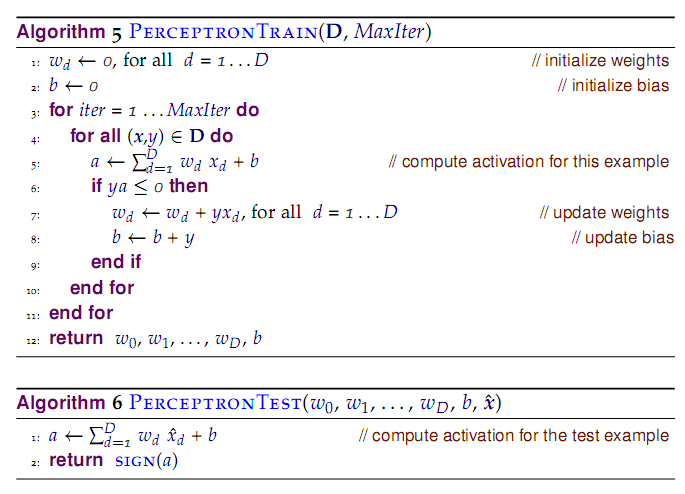

The algorithm is shown in the above image.

In [ ]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [ ]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

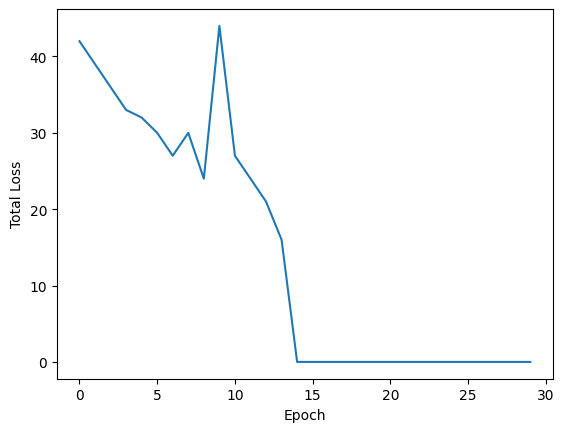

In [ ]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

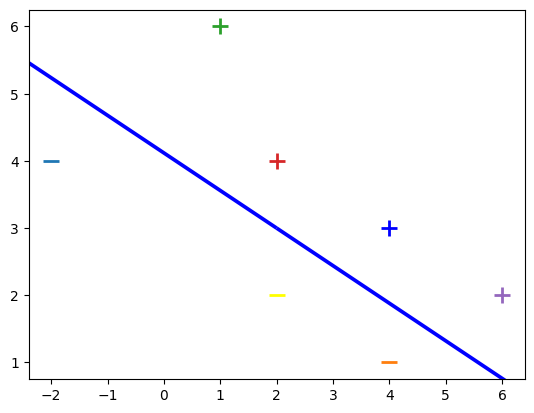

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_openml
import numpy as np

# Bacnk note dataset
dataset = fetch_openml(name="banknote-authentication", version=1)  # As per ChatGPT, I wasn't sure where to import the dataset from.
X = dataset.data
y = dataset.target

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
X = np.hstack((X, -1 * np.ones((X.shape[0], 1))))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(len(X_train), len(y_train), len(X_test), len(y_test))
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


1097 1097 275 275
(1097, 5) (1097,)
(275, 5) (275,)


In [41]:
X_train[:5]

array([[-1.3885  , 12.5026  ,  0.69118 , -7.5487  , -1.      ],
       [ 2.7744  ,  6.8576  , -1.0671  ,  0.075416, -1.      ],
       [-4.2887  , -7.8633  , 11.8387  , -1.8978  , -1.      ],
       [ 5.3586  ,  3.7557  , -1.7345  ,  1.0789  , -1.      ],
       [ 0.75736 ,  3.0294  ,  2.9164  , -0.068117, -1.      ]])

In [42]:
y_train[:5]

array([0, 0, 1, 0, 0])

Simple binary classification problem.

We can use a perceptron along with the cross-entropy loss to optimize the model.

We should expect the model's initial loss to be: -ln(1/2) = 0.69

Epoch 1/500 | train-loss: 2.5086 | test-loss: 2.4913
Epoch 100/500 | train-loss: 0.1066 | test-loss: 0.1429
Epoch 200/500 | train-loss: 0.0746 | test-loss: 0.1012
Epoch 300/500 | train-loss: 0.0607 | test-loss: 0.0828
Epoch 400/500 | train-loss: 0.0526 | test-loss: 0.0720
Epoch 500/500 | train-loss: 0.0472 | test-loss: 0.0648


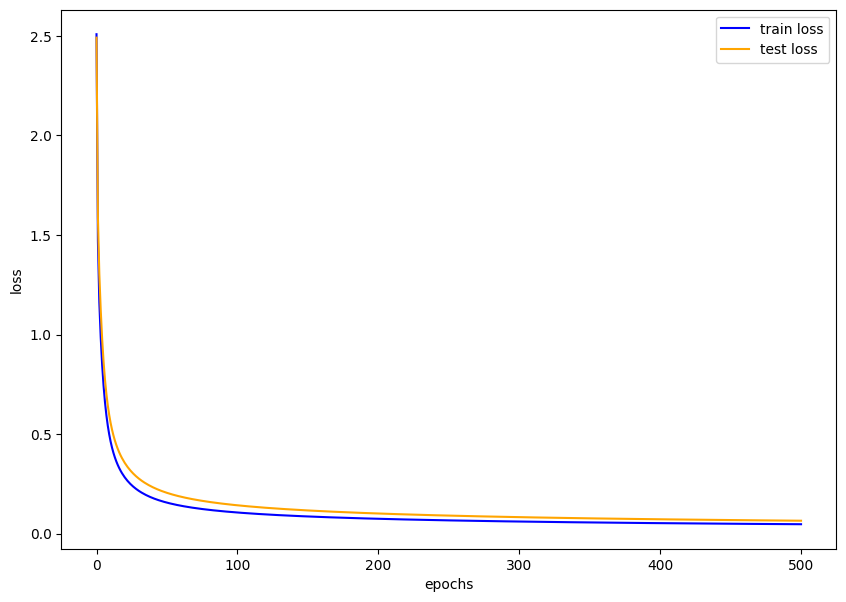

In [80]:
from typing import Dict, List

class Perceptron():
    def __init__(self,
                 n_features: int,
                 init_mode: str = "default"):
        """
        init_mode: choose (random) or (zeros)
        """
        self.n_features = n_features
        self.init_mode = init_mode
        self.init_theta()

    def init_theta(self):
        """
        Init the theta(s) with 'init_mode' (defined during obj init)
        """
        if self.init_mode == "random" or self.init_mode == "default":
            self.theta = np.random.rand(self.n_features)
        elif self.init_mode == "zeros":
            self.theta = np.zeros(self.n_features)
        else:
            raise ValueError(f"init_mode can only be: 'default', 'random', 'zeros. Got: {self.init_mode}")

    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        """
        Sigmoid activation function
        """
        return 1 / (1 + np.exp(-z))

    def loss(self, X, y) -> float:
        preds = self.sigmoid(X @ self.theta)
        eps = 1e-15
        preds = np.clip(preds, eps, 1-eps)
        _loss = -np.mean(y * np.log(preds) + (1-y)*np.log(1-preds))
        return _loss

    def train(self,
              X_train, y_train,
              X_test, y_test,
              epochs: int,
              lr: float = 1e-3,
              freq: int = 1,
              verbose: int = 1) -> Dict[List[float], List[float]]:
        """
        Train the perceptron and get results

        Args:
            X_train: train data (features)
            y_train: train data (targets)
            X_test: train data (features)
            y_test: train data (targets)
            epochs: number of train iters
            freq: print freq of the model's current 'stats'
            lr: learning rate (alpha)
        Returns:
            results (Dict[float]): Dict containing the model's results per epoch.
        """
        results = {"train": [],
                   "test": []}

        for epoch in range(epochs):
            # Calc loss before update
            train_loss = self.loss(X_train, y_train)
            test_loss = self.loss(X_test, y_test)

            # Train
            preds = self.sigmoid(np.dot(X_train, self.theta))
            dw = np.dot(X_train.T, (preds - y_train)) / len(y_train)
            self.theta -= lr * dw

            # Print for info
            if ((epoch + 1) % freq == 0 or epoch==0) and (verbose == 1):
                print(f"Epoch {epoch + 1}/{epochs} | train-loss: {train_loss:.4f} | test-loss: {test_loss:.4f}")
            # Save to dict
            results["train"].append(train_loss)
            results["test"].append(test_loss)

        # Final append
        train_loss = self.loss(X_train, y_train)
        test_loss = self.loss(X_test, y_test)
        results["train"].append(train_loss)
        results["test"].append(test_loss)
        return results

model = Perceptron(n_features = X_train.shape[1], init_mode="default")
results = model.train(X_train, y_train,
                      X_test, y_test,
                      epochs=500,
                      lr=1e-1,
                      freq=100)

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 7))
train_results = results["train"]
test_results = results["test"]
plt.plot(train_results, label="train loss", color="blue")
plt.plot(test_results, label="test loss", color="orange")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show();

The initial loss of the 'model' is 1.x, which is greater than expected. But this is ok. It implies that there exists more entropy in the model's initialization. Its soon corrected during training. This entropy is injected from the random initialization of theta.

Almost perfect. The 'little' divergence b/w the train and testing loss curves suggest that the mdoel is starting overfit.

In [83]:
# Checking how the lr effects the model's loss
lrs = [1.0, 1e-1, 1e-2, 1e-3, 1e-4]
epochs = 10

experiment_results = {}  # Dict[float, Dict[List[float], List[float]]]
model = Perceptron(n_features = X_train.shape[1], init_mode="zeros")  # Init at same 'point' for consistency in experiment

for lr in lrs:
    model.init_theta()  # Re-init theta
    print(model.theta)
    results = model.train(X_train, y_train,
                          X_test, y_test,
                          epochs = epochs,
                          lr = lr,
                          verbose = 0)  # Never print any info
    print(results["train"][0])
    print(results["test"][0])
    print("---")
    experiment_results[lr] = results

[0. 0. 0. 0. 0.]
0.6931471805599453
0.6931471805599453
---
[0. 0. 0. 0. 0.]
0.6931471805599453
0.6931471805599453
---
[0. 0. 0. 0. 0.]
0.6931471805599453
0.6931471805599453
---
[0. 0. 0. 0. 0.]
0.6931471805599453
0.6931471805599453
---
[0. 0. 0. 0. 0.]
0.6931471805599453
0.6931471805599453
---


We see that the initial loss is exactly -ln(1/2). This is due to the initialization of theta as zeros. i.e. there-exists no entropy and the 'weights' are evenly diffused in theta.

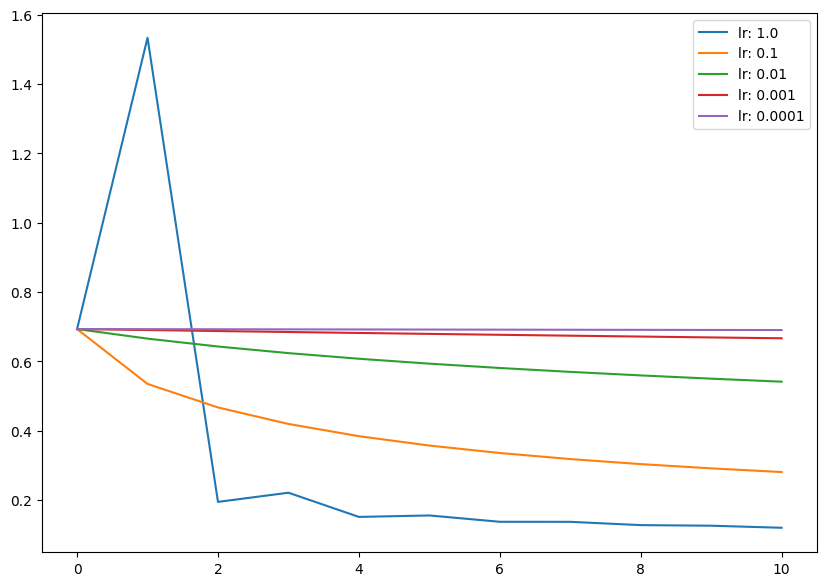

In [85]:
plt.figure(figsize=(10, 7))
for lr in lrs:
    results = experiment_results[lr]
    test_results = results["test"]
    plt.plot(test_results, label=f"lr: {lr}")
plt.legend()
plt.show();

The output graph suggests the a high learning-rate is good **in this case**.

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

---

# Answers

---

1. Perceptron learning AND\
**i.**\
Yes, the dataset is learnable by a Perceptron.
The perceptron is a linear classifier, meaning it can learn to classify datasets that are linearly separable. The AND function is a linearly separable function because there exists a linear decision boundary that can separate the positive and negative examples in the input space.\
**ii.**\
The Perceptron learning algorithm uses the following update rule:
- **Init**: Init the weights as: ($\theta = [0,0,...,0,0]^T$).
- **Pred**: Compute ($y_{\text{pred}} = (X\theta)$).
- **Weight update**: Use the loss function to compute the gradient(s) ($\frac{dL}{d\theta}$). Update weights using: $\theta := \theta - \alpha\frac{dL}{d\theta}$, where $\theta$ are the weights and $\alpha$ is the learning rate. Repeat until you have exhausted all the iterations/epochs.

---

2. Learnable boolean functions for a Perceptron

Learnable (few examples): AND, NAND, OR NOR. These boolean functions are linearly seprable.\
Non-Learnable: XOR, XNOR. These boolean functions are **not** linearly seprable.

So, there are total (14) functions that are learnable by a perceptron, while there are only 2 functions that are not learable (XOR and XNOR).

Truth table for non-learnable functions:

XOR:

|$x_1$|$x_2$|y|
|-|-|-|
|0|0|0|
|0|1|1|
|1|0|1|
|1|1|0|

XNOR:

|$x_1$|$x_2$|y|
|-|-|-|
|0|0|1|
|0|1|0|
|1|0|0|
|1|1|1|

---